# Particle Swarm Algorithm

In [21]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm

## Define the objective
Our objective is the [Six-Hump Camel](https://www.sfu.ca/~ssurjano/camel6.html) function. This function has six local minima, two of which are global.

In [22]:
@tf.function(input_signature=(tf.TensorSpec(shape=[None,None], dtype=tf.float64),)) 
def sixhumpcamel(X):
    F = (4.0 - 2.1 * X[:,0]**2 + X[:,0]**4 / 3) * X[:,0]**2 + X[:,0] * X[:,1] + (-4.0 + 4.0 * X[:,1]**2) * X[:,1]**2 
    return tf.reshape(F, (-1,1))

Let's plot the objective function. The 3D surface on the left is the input domain used during the optimization. The one on the right is zoomed in to show the function contours around the minima.

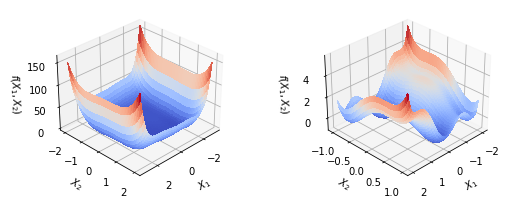

In [23]:
n=100 # Number of points for plotting

fig, ax = plt.subplots(1,2,subplot_kw={"projection": "3d"}, figsize=[8,6])

# Plot to input domain
x1 = np.linspace(-3,3,n)
x2 = np.linspace(-2,2,n)
X1,X2 = np.meshgrid(x1,x2)
X = np.hstack([X1.reshape([-1,1]),X2.reshape([-1,1])])
Y = sixhumpcamel(X)
Y = Y.numpy().reshape(X1.shape)

ax[0].plot_surface(X1, X2, Y, cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax[0].view_init(30, 45)
ax[0].set_xlabel('$X_{1}$')
ax[0].set_ylabel('$X_{2}$')
ax[0].set_zlabel('$f(X_{1},X_{2})$')

# Plot zoomed in view
x1 = np.linspace(-2,2,n)
x2 = np.linspace(-1,1,n)
X1,X2 = np.meshgrid(x1,x2)
X = np.hstack([X1.reshape([-1,1]),X2.reshape([-1,1])])
Y = sixhumpcamel(X)
Y = Y.numpy().reshape(X1.shape)

ax[1].plot_surface(X1, X2, Y, cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax[1].view_init(30, 45)
ax[1].set_xlabel('$X_{1}$')
ax[1].set_ylabel('$X_{2}$')
ax[1].set_zlabel('$f(X_{1},X_{2})$')

plt.subplots_adjust(wspace = 0.5)

## Perform the optimization
Here we'll begin the optimizer. Hyperparameters such as the population size, generations, interia, cognitive and social coefficients may need to be tuned to your particular application.

In [24]:
from gatf import PSO

In [25]:
# Instantiate the optimizer
pso = PSO(sixhumpcamel,
          population_size = 10,
          n_variables = 2,
          generations = 200,
          upperbound = [3.0,2.0],
          lowerbound = [-3.0,-2.0],
          inertia = 0.8,
          cognitive_coeff = 0.1,
          social_coeff = 0.1,
          position_tolerance = 0.0
         )  

In [26]:
# Go!
res = pso()

Generation 200 – min -1.03 - mean -0.93 – max -0.01 – best -1.03   
Complete


## Plot results
First let's look at the final best solution on a contour plot of the objective function. The global minimum are indicated by the __X__. The algorithm found one of two global minima. Multiple restarts may be necessary if you suspect that more than one minimum exists.

Text(0, 0.5, '$X_{2}$')

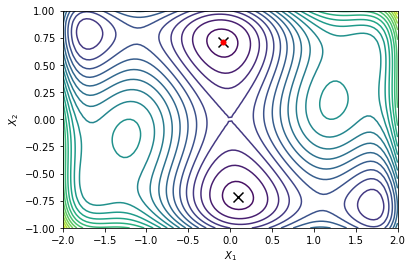

In [27]:
# Get results to plot
X = res['X_best']

fig,ax = plt.subplots()

ax.contour(X1, X2, Y, levels = 25)
ax.scatter([0.0898,-0.0898], [-0.7126,0.7126], c = 'k', alpha = 1, marker = 'x', s = 100, label = 'Global minima')
ax.scatter(X[:,0], X[:,1], alpha = 1, marker = 'o', c='r', s = 25)
ax.set_xlim([-2,2])
ax.set_ylim([-1,1])
ax.set_xlabel(r'$X_{1}$')
ax.set_ylabel(r'$X_{2}$')

## Plot statistics
Here we can see the progress of the optimization. We'll plot the minimum and mean fitness of the population per generation.

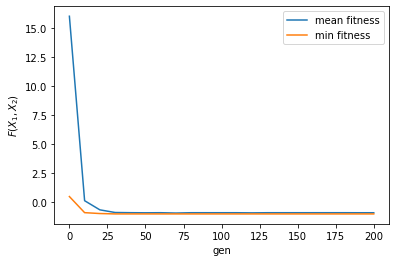

In [28]:
# Get results to plot
stats = res['statistics']

gens = np.array(stats['gen'])
f_mean = np.array(stats['fitness_mean'])
f_min = np.array(stats['fitness_min'])

fig,ax = plt.subplots()
ax.plot(gens,f_mean,label='mean fitness')
ax.plot(gens,f_min,label='min fitness')
ax.legend()
ax.set_xlabel('gen')
ax.set_ylabel(r'$F(X_{1},X_{2})$')
ax.set_yscale('linear')